In [3]:
!pip install pandas
import pandas as pd

In [4]:
#reading data
df=pd.read_csv('car data.csv')

In [5]:
#first few records 
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
#checking rows and columns
df.shape

(301, 9)

#### checking unique categories in categorical feature

In [7]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [8]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [9]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [10]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [11]:
#checking null values
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [12]:
#statistical summary
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [13]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [14]:
#dropping car name in final data 
final_data=df[['Year','Selling_Price','Present_Price','Kms_Driven','Owner','Transmission','Fuel_Type','Seller_Type']]

In [15]:
final_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Transmission,Fuel_Type,Seller_Type
0,2014,3.35,5.59,27000,0,Manual,Petrol,Dealer
1,2013,4.75,9.54,43000,0,Manual,Diesel,Dealer
2,2017,7.25,9.85,6900,0,Manual,Petrol,Dealer
3,2011,2.85,4.15,5200,0,Manual,Petrol,Dealer
4,2014,4.60,6.87,42450,0,Manual,Diesel,Dealer


In [16]:
#creating new feature
final_data['current_year']=2024

In [19]:
final_data['no_of_year']=final_data['current_year']-final_data['Year']

In [21]:
#dropiing year and current year
final_data.drop(columns=['Year', 'current_year'], axis=1, inplace=True)

In [22]:
final_data

,Selling_Price,Present_Price,Kms_Driven,Owner,Transmission,Fuel_Type,Seller_Type,no_of_year
0,3.35,5.59,27000,0,Manual,Petrol,Dealer,10
1,4.75,9.54,43000,0,Manual,Diesel,Dealer,11
2,7.25,9.85,6900,0,Manual,Petrol,Dealer,7
3,2.85,4.15,5200,0,Manual,Petrol,Dealer,13
4,4.60,6.87,42450,0,Manual,Diesel,Dealer,10
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,Manual,Diesel,Dealer,8
297,4.00,5.90,60000,0,Manual,Petrol,Dealer,9
298,3.35,11.00,87934,0,Manual,Petrol,Dealer,15
299,11.50,12.50,9000,0,Manual,Diesel,Dealer,7


In [23]:
#conveerting categorical feature into numerical feature
final_data=pd.get_dummies(final_data, drop_first=True)

In [24]:
final_data

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_year,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual
0,3.35,5.59,27000,0,10,1,0,1,0
1,4.75,9.54,43000,0,11,1,1,0,0
2,7.25,9.85,6900,0,7,1,0,1,0
3,2.85,4.15,5200,0,13,1,0,1,0
4,4.60,6.87,42450,0,10,1,1,0,0
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,8,1,1,0,0
297,4.00,5.90,60000,0,9,1,0,1,0
298,3.35,11.00,87934,0,15,1,0,1,0
299,11.50,12.50,9000,0,7,1,1,0,0


In [25]:
#correlation
final_data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_year,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,-0.367128,0.552339,-0.540571,-0.550724
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,-0.348715,0.473306,-0.465244,-0.512030
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,-0.162510,0.172515,-0.172874,-0.101419
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.050316,-0.053469,0.055687,0.124269
no_of_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.000394,-0.064315,0.059959,0.039896
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,1.000000,-0.098643,0.091013,0.063240
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,-0.098643,1.000000,-0.979648,-0.350467
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,0.091013,-0.979648,1.000000,0.358321
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,0.063240,-0.350467,0.358321,1.000000


In [31]:
!pip install scikit-learn

     ---------------------------------------- 7.1/7.1 MB 825.1 kB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 34.1/34.1 MB 1.2 MB/s eta 0:00:00


In [38]:
#separating independent and dependent features
x=final_data.drop('Selling_Price', axis=1)
y=final_data['Selling_Price']

In [39]:
# Important features
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [40]:
print(model.feature_importances_)

[0.39615929 0.03910851 0.0008024  0.08250447 0.12788701 0.21632864
 0.01478295 0.12242673]


In [47]:
import matplotlib.pyplot as plt

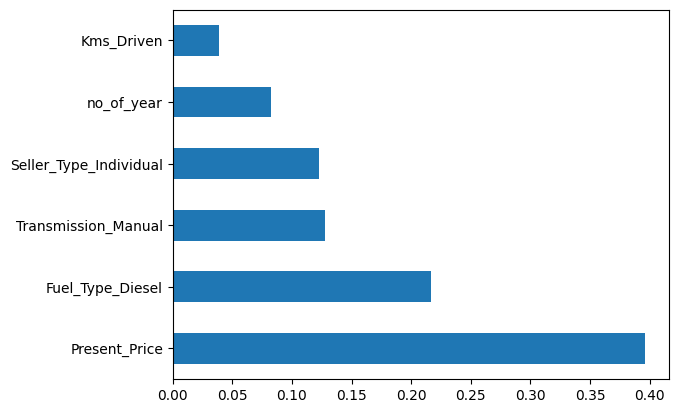

In [51]:
#plotting top 6 important features
feat_importances=pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [54]:
#splitting data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [57]:
#linear regression
from sklearn.linear_model import LinearRegression
clf=LinearRegression()
clf.fit(x_train,y_train)
print('training score {.2f}', clf.score(x_train,y_train))
print('testing score {.2f}', clf.score(x_test,y_test))

training score {.2f} 0.8829395727043557
testing score {.2f} 0.8770281948906475


In [65]:
#no need for scaling since rrandom forest
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [59]:
#hyperparamters
import numpy as np

#no of trees
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=12)]

#no of features to consider at evry split
max_features=['auto','sqrt']

#max depth
max_depth=[int(x) for x in np.linspace(5,30, num=6)]

#min number of samples required to split a node
min_samples_split=[2,5,10,15,100]

#min number of samples at each leaf node
min_samples_leaf=[1,2,5,10]

In [60]:
#helps to find out the best parameters
from sklearn.model_selection import RandomizedSearchCV

In [62]:
#crating random grid
random_grid={'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [66]:
rf_random=RandomizedSearchCV(estimator=rf, param_distributions=random_grid,scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1 )

In [67]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [68]:
predictions=rf_random.predict(x_test)

In [69]:
predictions

array([ 0.71197, 10.08657,  5.62645,  0.29908,  6.83321,  6.2037 ,
        0.91467,  0.59836,  0.49527,  6.19845, 11.67355,  0.83946,
        7.27368,  0.67433,  5.40085,  3.03629,  0.98105, 11.30621,
        0.6329 ,  1.45011,  0.51623,  8.7106 ,  5.95426,  2.8294 ,
        0.54053,  3.70405,  5.2382 ,  3.0493 ,  1.1693 ,  1.06056,
        0.60541,  9.76922,  0.43741,  2.65699,  8.08594,  4.1454 ,
        6.08468,  4.81809,  3.24647,  5.32059,  4.00912,  4.10481,
        4.83516,  0.54895,  6.83865,  0.546  ,  7.0087 ,  5.92683,
        3.1591 ,  4.45817,  5.40227,  1.39414, 20.8002 , 20.72073,
        6.8235 ,  8.58975,  5.1713 ,  9.46379,  2.58223,  7.38482,
        0.30836,  0.27046,  0.89226,  0.30042,  4.5053 ,  1.13186,
       19.96695, 20.91453,  6.20844,  0.4764 ,  4.50363,  4.00924,
        5.70733,  4.47525,  2.98595,  0.85595])

<IPython.core.display.Javascript object>

C:\Users\user\anaconda3\envs\car_price_prediction\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

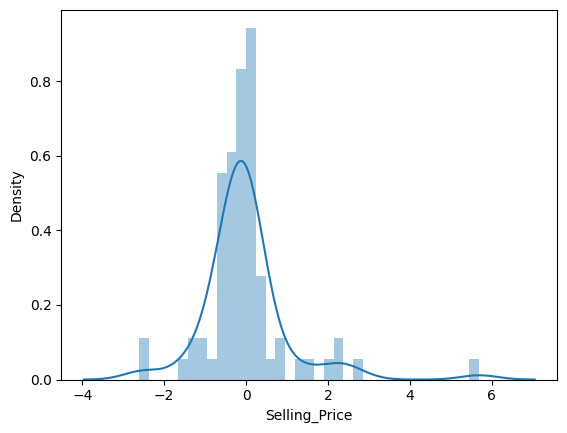

In [72]:
sns.distplot(y_test-predictions)

y test is actuall and graph shows that difference is minimal

In [73]:
rf.fit(x_train,y_train)
print('training score {.2f}', rf.score(x_train,y_train))
print('testing score {.2f}', rf.score(x_test,y_test))

training score {.2f} 0.9843966678754043
testing score {.2f} 0.9697363217494411


In [75]:
import pickle
#open file where data will be stored
file=open('random_forest_regression_model.pkl','wb')

# dump information to that file 
pickle.dump(rf_random, file)